In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

from sklearn.datasets import load_boston


# Load Data

In [2]:
data_dict = load_boston()
df = pd.DataFrame(data=data_dict['data'], columns=data_dict['feature_names'] )
df['price'] = data_dict['target']
df.columns = [col.lower() for col in df.columns.tolist()]
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


# ML 학습

In [3]:
y = df["price"]
X = df.drop(["price"], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

model = LGBMRegressor()    
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE:{rmse}")    

RMSE:2.7499463831274227


# DL 학습

In [4]:
# ! pip install keras         #분석을 위한 tensorflow 내 벡엔드엔진
# ! pip install tensorflow

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf

In [6]:
np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [8]:
y = df["price"]
X = df.drop(["price"], axis=1)

In [9]:
print(X.shape, y.shape)

(506, 13) (506,)


In [10]:
model = Sequential()



model.add(Dense(units=20, activation='relu', input_dim=13))  #input  layer
model.add(Dense(units=8, activation='relu'))                 #hidden layer1
model.add(Dense(units=8, activation='relu'))                 #hidden layer2
model.add(Dense(units=4, activation='relu'))                 #hidden layer3
model.add(Dense(units=1, activation='sigmoid'))                                    #output layer

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [12]:
# lom 설정
model.compile(loss="mean_squared_error",    #mse
              optimizer="adam"  #rmsprop
              )  #metrics="mse"

In [19]:
res = model.fit(X, y,
    epochs=100,
    validation_split=0.2
    #callbacks=None,
    #batch_size=None,
    #validation_data=None,
                
)         

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 21.9510 - val_loss: 46.5904
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 19.3984 - val_loss: 38.9597
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 18.7539 - val_loss: 40.3244
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 18.3185 - val_loss: 44.2097
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 20.2188 - val_loss: 44.0197
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 18.4006 - val_loss: 39.2437
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 18.6419 - val_loss: 40.0448
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 17.8234 - val_loss: 39.2603
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 19.2897 - val_loss: 45.0758
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 20.5453 - val_los

In [16]:
np.sqrt(32.3235)

5.685375977013306

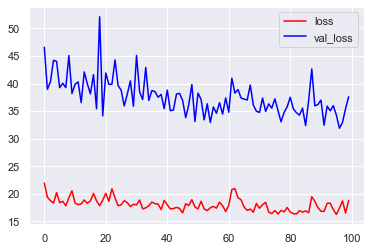

In [21]:

plt.plot(np.arange(len(res.history['loss'])), res.history['loss'],    c="red", label="loss")
plt.plot(np.arange(len(res.history['loss'])), res.history['val_loss'], c="blue", label="val_loss")
plt.legend()
plt.show()


In [17]:
#--- loss mse  val_loss  val_mse 
model.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 54.1548


54.15481185913086